# Selecting and Traning Models
1. Select and Train a few Algorithms(Linear Regression, Decision Tree, RandomForest)
2. Model Evaluation using Cross Validation
3. Hyperparameter Tuning using GridSearchCV
4. Check Feature Importance
5. Evaluate the Final System on test data
6. Saving the Model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer



import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read in csv data
attrition_df = pd.read_csv("data/IBM_attrition_data.csv")
data = attrition_df.copy()
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
data["BusinessTravel"].unique

<bound method Series.unique of 0           Travel_Rarely
1       Travel_Frequently
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
              ...        
1465    Travel_Frequently
1466        Travel_Rarely
1467        Travel_Rarely
1468    Travel_Frequently
1469        Travel_Rarely
Name: BusinessTravel, Length: 1470, dtype: object>

In [8]:
data["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [9]:
len(data)

1470

## Select Feature Columns to Include in Model

In [10]:
data = data[["Attrition", "Age", "Education", "DistanceFromHome", "JobInvolvement", "HourlyRate", "JobRole", "Gender", "BusinessTravel"]].copy()

In [11]:
data.head()

,Attrition,Age,Education,DistanceFromHome,JobInvolvement,HourlyRate,JobRole,Gender,BusinessTravel
0,Yes,41,2,1,3,94,Sales Executive,Female,Travel_Rarely
1,No,49,1,8,2,61,Research Scientist,Male,Travel_Frequently
2,Yes,37,2,2,2,92,Laboratory Technician,Male,Travel_Rarely
3,No,33,4,3,3,56,Research Scientist,Female,Travel_Frequently
4,No,27,1,2,3,40,Laboratory Technician,Male,Travel_Rarely


In [12]:
data.dtypes

Attrition           object
Age                  int64
Education            int64
DistanceFromHome     int64
JobInvolvement       int64
HourlyRate           int64
JobRole             object
Gender              object
BusinessTravel      object
dtype: object

In [13]:
len(data)

1470

## Set Train and Test Data Set

In [14]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [15]:
# Segregating target and feature variables 
data = train_set.drop("Attrition", axis=1)
data_labels = train_set["Attrition"].copy()

len(data)

1176

In [16]:
len(data_labels)

1176

In [17]:
data_labels

1097     No
727      No
254      No
1175     No
1341     No
       ... 
1130     No
1294     No
860     Yes
1459     No
1126     No
Name: Attrition, Length: 1176, dtype: object

## Function for Preprocessing Categorical Features

In [18]:
def preprocess_cat_columns(data):
    data["Education"] = data["Education"].map({1:"Below College", 2:"College", 3:"Bachelor", 4:"Master",5:"Doctor"}) 
    data["JobInvolvement"] = data["JobInvolvement"].map({1:"Low", 2:"Medium", 3:"High", 4:"Very High"})
    return data


In [19]:
# Number pipeline transformer 
def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe 
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
    '''
    numerics = ['int64']

    num_attrs = data.select_dtypes(include=numerics)

    num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

# Complete transformation for categorical and numeric data
def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    nuerical and categorical data.
    
    Argument:
        data: original dataframe 
    Returns:
        prepared_data: transformed data, ready to use
    '''
    cat_attrs = ["Education", "JobInvolvement", "BusinessTravel", "Gender", "JobRole"]
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    global full_pipeline
    full_pipeline = ColumnTransformer([
        ("num", num_pipeline, list(num_attrs)),
        ("cat", OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [20]:
##from raw data to processed data in 2 steps
preprocessed_df = preprocess_cat_columns(data)
preprocessed_df

,Age,Education,DistanceFromHome,JobInvolvement,HourlyRate,JobRole,Gender,BusinessTravel
1097,24,College,21,Medium,57,Laboratory Technician,Male,Travel_Rarely
727,18,College,5,High,73,Research Scientist,Male,Non-Travel
254,29,College,20,High,45,Sales Executive,Male,Travel_Rarely
1175,39,Bachelor,12,High,66,Manufacturing Director,Male,Travel_Rarely
1341,31,Bachelor,20,High,89,Laboratory Technician,Male,Travel_Rarely
...,...,...,...,...,...,...,...,...
1130,35,Bachelor,28,Very High,46,Laboratory Technician,Male,Travel_Rarely
1294,41,Bachelor,5,Very High,85,Healthcare Representative,Male,Travel_Rarely
860,22,Master,3,Medium,48,Research Scientist,Male,Travel_Frequently
1459,29,College,13,Medium,46,Laboratory Technician,Male,Travel_Rarely


In [22]:
preprocessed_df.shape

(1176, 8)

In [23]:
# Transform data 
prepared_data = pipeline_transformer(data)
prepared_data

array([[-1.38855944,  1.44039645, -0.47283217, ...,  0.        ,
         0.        ,  0.        ],
       [-2.04073779, -0.52269928,  0.30937375, ...,  1.        ,
         0.        ,  0.        ],
       [-0.84507748,  1.31770296, -1.05948661, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.60595222, -0.76808624, -0.912823  , ...,  1.        ,
         0.        ,  0.        ],
       [-0.84507748,  0.45884859, -1.01059874, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.43754676, -0.03192534, -0.37505643, ...,  0.        ,
         0.        ,  0.        ]])

In [25]:
prepared_data.shape

(1176, 26)

## Selecting Training Models

# Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(prepared_data, data_labels)

LogisticRegression()

In [27]:
print(f"Logisitc Regression Training Data Score: {log_reg.score(prepared_data, data_labels)}")

Logisitc Regression Training Data Score: 0.8358843537414966


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(prepared_data, data_labels)

DecisionTreeClassifier()

In [29]:
print(f"Decision Tree Training Data Score: {decision_tree.score(prepared_data, data_labels)}")

Decision Tree Training Data Score: 1.0


In [30]:
# Predicitons using Decision Tree 

attrition_predict = decision_tree.predict(prepared_data)
print(f"First 10 Predictions: {attrition_predict[:25]}")

First 10 Predictions: ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
forest_clf.fit(prepared_data, data_labels)

RandomForestClassifier()

In [32]:
print(f"Random Forest Training Data Score: {forest_clf.score(prepared_data, data_labels)}")

Random Forest Training Data Score: 1.0


# SVC

In [33]:
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(prepared_data, data_labels)

SVC(kernel='linear')

In [34]:
print(f"SVC Training Data Score: {forest_clf.score(prepared_data, data_labels)}")

SVC Training Data Score: 1.0


## Hyperparameter Tuning w/ GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

forest_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [36]:
# Grid search with forest_clf model
param_grid = [{'n_estimators': [15, 25, 50, 75, 100], 'max_features': [1, 5, 10, 15]},
             {'bootstrap': [True], 'n_estimators': [15, 25, 50, 75, 100],'max_features': [1, 5, 10, 15] }]
grid_search = GridSearchCV(forest_clf, param_grid=param_grid, cv=5, verbose=0)

In [37]:
grid_search.fit(prepared_data, data_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [1, 5, 10, 15],
                          'n_estimators': [15, 25, 50, 75, 100]},
                         {'bootstrap': [True], 'max_features': [1, 5, 10, 15],
                          'n_estimators': [15, 25, 50, 75, 100]}])

In [990]:
grid_search.best_estimator_

RandomForestClassifier(max_features=1, n_estimators=50)

In [39]:
# Best Params
print(grid_search.best_params_)

{'max_features': 1, 'n_estimators': 75}


In [40]:
cv_scores = grid_search.cv_results_

for mean_score, params in zip(cv_scores['mean_test_score'], cv_scores["params"]):
    print(np.sqrt(mean_score), params)

0.9030460933220754 {'max_features': 1, 'n_estimators': 15}
0.9063266829663361 {'max_features': 1, 'n_estimators': 25}
0.9035092061973554 {'max_features': 1, 'n_estimators': 50}
0.9091374115241416 {'max_features': 1, 'n_estimators': 75}
0.903505214859349 {'max_features': 1, 'n_estimators': 100}
0.9006809140352207 {'max_features': 5, 'n_estimators': 15}
0.9011572477334047 {'max_features': 5, 'n_estimators': 25}
0.9044466821972497 {'max_features': 5, 'n_estimators': 50}
0.9053891620733351 {'max_features': 5, 'n_estimators': 75}
0.9082008067455357 {'max_features': 5, 'n_estimators': 100}
0.9020951691445941 {'max_features': 10, 'n_estimators': 15}
0.9011512450939849 {'max_features': 10, 'n_estimators': 25}
0.9049230262157139 {'max_features': 10, 'n_estimators': 50}
0.903505214859349 {'max_features': 10, 'n_estimators': 75}
0.9039780657242155 {'max_features': 10, 'n_estimators': 100}
0.8949934876578006 {'max_features': 15, 'n_estimators': 15}
0.8959459117670646 {'max_features': 15, 'n_estima

## Checking Feature Importances 

In [41]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.2282897 , 0.17743582, 0.20411489, 0.02248396, 0.01392739,
       0.01696396, 0.00581814, 0.01763905, 0.02063352, 0.01833453,
       0.02063384, 0.01330691, 0.01285996, 0.02449445, 0.02223829,
       0.01792971, 0.01536985, 0.01246424, 0.01204612, 0.02485262,
       0.0092462 , 0.0129955 , 0.00873882, 0.01869373, 0.02125402,
       0.0272348 ])

In [42]:
objects = ['object', 'int64']
# nume = ['int64']
names = list(data.select_dtypes(include=objects))

attrs = names
feature_top = sorted(zip(attrs, feature_importances), reverse=False)
feature_top_df = pd.DataFrame(data=feature_top)
feature_top_sorted = feature_top_df.sort_values(by=1, ascending=False)
feature_top_sorted

,0,1
0,Age,0.228290
2,DistanceFromHome,0.204115
3,Education,0.177436
6,JobInvolvement,0.022484
1,BusinessTravel,0.017639
7,JobRole,0.016964
5,HourlyRate,0.013927
4,Gender,0.005818


## Evaluatiing Model on Test Data

In [43]:
final_model = grid_search.best_estimator_

X_test = test_set.drop("Attrition", axis=1)
y_test = test_set["Attrition"].copy()

X_test_preprocessed = preprocess_cat_columns(X_test)
X_test_prepared = pipeline_transformer(X_test_preprocessed)

print('Test Acc: %.3f' % grid_search.score(X_test_prepared, y_test))

Test Acc: 0.857


In [44]:
# Make Predictions 
predictions = final_model.predict(X_test_prepared)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']
First 10 Actual labels: ['No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


In [997]:
# Predictions vs. actual df
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,No,No
1,No,No
2,No,Yes
3,No,No
4,No,No
...,...,...
289,No,No
290,No,No
291,No,No
292,No,No


## Function to Capture Model

In [45]:
def predict_attrition(config, model):
    
    if type(config) == dict:
        df_prep = config.copy()
        df = pd.DataFrame(df_prep, index=[0])
    else:
        df = config

    preproc_df = preprocess_cat_columns(df)
    prepared_df = pipeline_transformer(preproc_df)
    y_pred = model.predict(prepared_df)
    probability = model.predict_proba(prepared_df)

    return y_pred, probability

## Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
print(cm)

[[250   5]
 [ 37   2]]


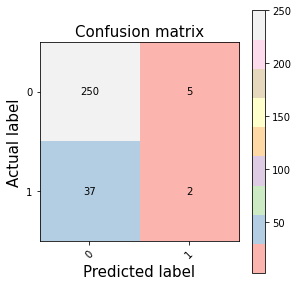

In [47]:
plt.figure(figsize=(4,4))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["0", "1"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape
for x in range(width):
 for y in range(height):
  plt.annotate(str(cm[x][y]), xy=(y, x), 
  horizontalalignment='center',
  verticalalignment='center')

In [48]:
#[row, column]
tp = cm[0, 0]
tn = cm[1, 1]
fp = cm[0, 1]
fn = cm[1, 0]

In [49]:
print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))

True Positives: 250
True Negatives: 2
False Positives: 5
False Negatives: 37


## Classification Report

In [50]:
from sklearn.metrics import classification_report
target_names = ["Yes", "No"]
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

         Yes       0.87      0.98      0.92       255
          No       0.29      0.05      0.09        39

    accuracy                           0.86       294
   macro avg       0.58      0.52      0.50       294
weighted avg       0.79      0.86      0.81       294



In [52]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score

In [53]:
# Classification Accuracy: Overall, how often is the classifier correct?

print("Accuracy Math:" + str((tp + tn) / float(tp + tn + fp + fn)))

accuracy = accuracy_score(y_test, predictions)
print("Accuracy Sklearn: " + str(accuracy))

Accuracy Math:0.8571428571428571
Accuracy Sklearn: 0.8571428571428571


In [54]:
# Classification Sensitivity: When the actual value is positive, how often is the prediction correct?

print("Sensitivity Math:" + str(tp / float(fn + tp))) 

recall = recall_score([1 if x == "Yes" else 0 for x in y_test], 
                            [1 if x == "Yes" else 0 for x in predictions])
print("Sensitivity Sklearn: " + str(recall))

Sensitivity Math:0.8710801393728222
Sensitivity Sklearn: 0.05128205128205128


In [55]:
# Classification Precision: When a positive value is predicted, how often is the prediction correct?
print("Precision Math:" + str(tp / float(tp + fp))) 

precision = precision_score([1 if x == "Yes" else 0 for x in y_test], 
                            [1 if x == "Yes" else 0 for x in predictions])
print("Precision Sklearn: " + str(precision))

Precision Math:0.9803921568627451
Precision Sklearn: 0.2857142857142857


## ROC Curve

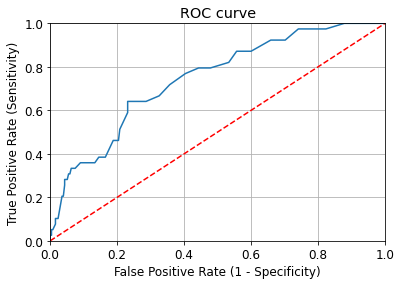

In [1008]:
fpr, tpr, thresholds = roc_curve([1 if x == "Yes" else 0 for x in y_test], forest_clf.predict_proba(X_test_prepared)[:, 1])

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [57]:
# AUC is the percentage of the ROC plot that is underneath the curve:

print(roc_auc_score([1 if x == "Yes" else 0 for x in y_test], forest_clf.predict_proba(X_test_prepared)[:, 1]))

0.7079939668174963


In [58]:
# Saving the final model
import pickle

with open('attrition_prediction_model.bin', 'wb') as f_out: 
    pickle.dump(final_model, f_out)
    f_out.close()

## Preprocess for Input Data

In [63]:
data_new_X = {"Age": 34,
    "Education": "Master",
    "DistanceFromHome": 2,
    "JobInvolvement": "High",
    "HourlyRate": 70,
    "JobRole": "Sales Executive",
    "Gender": "Female",
    "BusinessTravel": "Travel_Rarely"
    }

data_new_X_df = pd.DataFrame(data_new_X, index=[0])
data_new_X_df

,Age,Education,DistanceFromHome,JobInvolvement,HourlyRate,JobRole,Gender,BusinessTravel
0,34,Master,2,High,70,Sales Executive,Female,Travel_Rarely


In [64]:
data_new_X_yes = {"Age": 28,
                "Education": "College",
                "DistanceFromHome": 29,
                "JobInvolvement": "Low",
                "HourlyRate": 70,
                "JobRole": "Laboratory Technician",
                "Gender": "Male",
                "BusinessTravel": "Travel_Frequently"
}

data_new_X_yes_df = pd.DataFrame(data_new_X_yes, index=[0])
data_new_X_yes_df

,Age,Education,DistanceFromHome,JobInvolvement,HourlyRate,JobRole,Gender,BusinessTravel
0,28,College,29,Low,70,Laboratory Technician,Male,Travel_Frequently


In [65]:
from sklearn.pipeline import make_pipeline

In [66]:
pipe = make_pipeline(full_pipeline, final_model)

In [67]:
pipe.fit(data, data_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DistanceFromHome',
                                                   'HourlyRate']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Education',
                                                   'JobInvolvement',
                                                   'BusinessTravel', 'Gender',
                                                   'JobRole'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=1, n_estimators=75))])

In [68]:
pipe.predict(data_new_X_df)

array(['No'], dtype=object)

In [69]:
pipe.predict(data_new_X_yes_df)

array(['No'], dtype=object)

In [70]:

pipe.predict(X_test_preprocessed)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No'

In [71]:

X_test_preprocessed.iloc[20,:]

Age                                    31
Education                         College
DistanceFromHome                       29
JobInvolvement                     Medium
HourlyRate                             71
JobRole             Laboratory Technician
Gender                               Male
BusinessTravel          Travel_Frequently
Name: 259, dtype: object